독립변수 x

CRIM: 범죄율

INDUS: 비소매상업지역 면적 비율

NOX: 일산화질소 농도

RM: 주택당 방 수

LSTAT: 인구 중 하위 계층 비율

B: 인구 중 흑인 비율

PTRATIO: 학생/교사 비율

ZN: 25,000 평방피트를 초과 거주지역 비율

CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0

AGE: 1940년 이전에 건축된 주택의 비율

RAD: 방사형 고속도로까지의 거리

DIS: 직업센터의 거리

TAX: 재산세율

종속변수 y

MEDV : 보스턴 506개 타운의 1978년 주택 가격 중앙값 본인소유의 주택 가격 (단위 1,000 달러)

In [38]:
# 필요한 모듈 호출
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import model_selection
from sklearn .linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score # MSE, r2(선형회귀모델 적합도: 분산값, 1에 가까울수록 적합도 높음)
from sklearn.metrics import explained_variance_score, r2_score


# 데이터 불러오기
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
df_data = pd.read_csv(data_url, sep = '\s+', header = None) # csv 데이터 로드
df_data.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', "NOX", "RM", "AGE", "DIS", "RAD", 'TAX', 'PTRATIO', "B", "LSTAT", "MEDV"] # 데이터프레임의 열 지정
df_data.head() # 출력

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


선형회귀분석에서 종속변수의 분산은 다음과 같이 평균과의 차이를 제곱한 것.


다음과 같이 평균과의 차이를 제곱한 것의 합(이하 Sum of Squared Total, SST)

$$
SST = \sum_{i=1}^n (y_i - \bar{y})^2
$$

만약 모델로 추정한 값이 $\hat{y_i}$라고 한다면, 

잔차(residual)의 제곱합(이하 Sum of Squared Residual, SSR)은 다음과 같다.

$$SSR = \sum_{i=1}^n (y_i - \hat{y_i})^2$$

이들을 이용해 결정계수($R^2$)을 다음과 같이 정의한다.

$$ R^2 = 1 - {SSR \over SST} $$

결정계수(R2)와 설명분산점수 (Explained Variance Score)

R2=1 – (Sum of Squared Residuals / Total Variance)

Explained Variance Score = 1 – ( (Sum of Squared Residuals – Mean Error) / Total Variance )

In [39]:
# 결측치 탐색
df_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [40]:
df_data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Index(['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'], dtype='object')


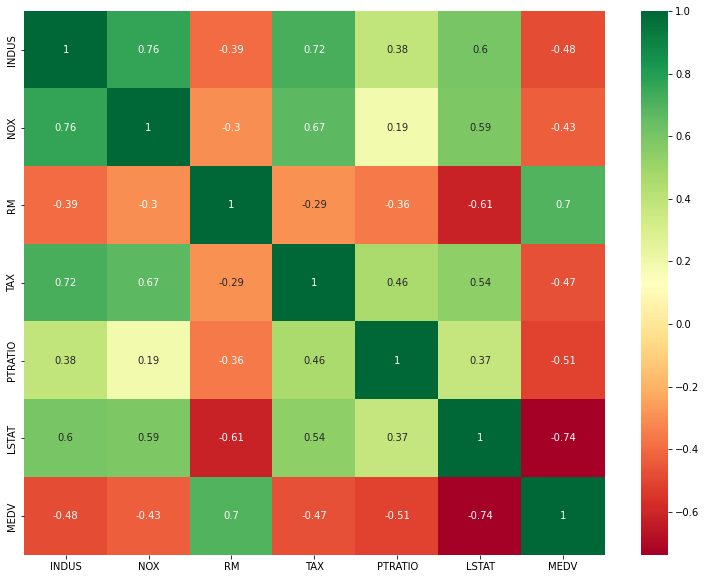

In [41]:
# 상관 분석
corrmat = df_data.corr()
corr_columns = corrmat.index[abs(corrmat["MEDV"]) >= 0.4] # 상관계수 절댓값 0.4 이상만 포함
print(corr_columns)
plt.figure(figsize = (13, 10))
heatmap = sns.heatmap(df_data[corr_columns].corr(), annot = True, cmap = "RdYlGn")
    
    # 상관 분석 결과 하위계층 주거 비율이 집값을 떨어트리고 방 개수가 집값을 상승하는 중요 요소

Pairplot
- 수치에 해당하는 그래프를 전반적으로 그려줌
- 관계 그래프를 확인할 수 있음
- 전반적인 상태를 확인할 수 있어 처음 데이터를 확인할 때 전체를 파악하기 좋음

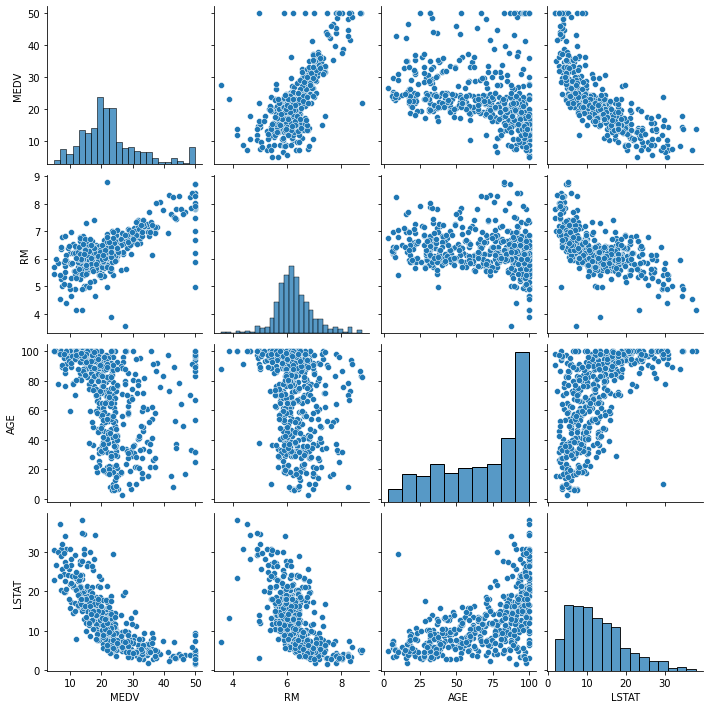

In [42]:
sns.pairplot(df_data[["MEDV", "RM", "AGE", "LSTAT"]]) # 집값(MEDV: 종속변수)이 방 개수(RM), 노후화 정도(AGE), 하위계층주거비율(LSTAT) 영향을 받는지 조사 y = ax + b
plt.show()

그래프 해석
- 방 개수가 증가할 수록 집값은 증가하는 경향이 뚜렷하다.
- 노후화 정도와 집값은 관계가 없어보인다.
- 하층민 주거 비율이 높을 수록 집값이 떨어진다.

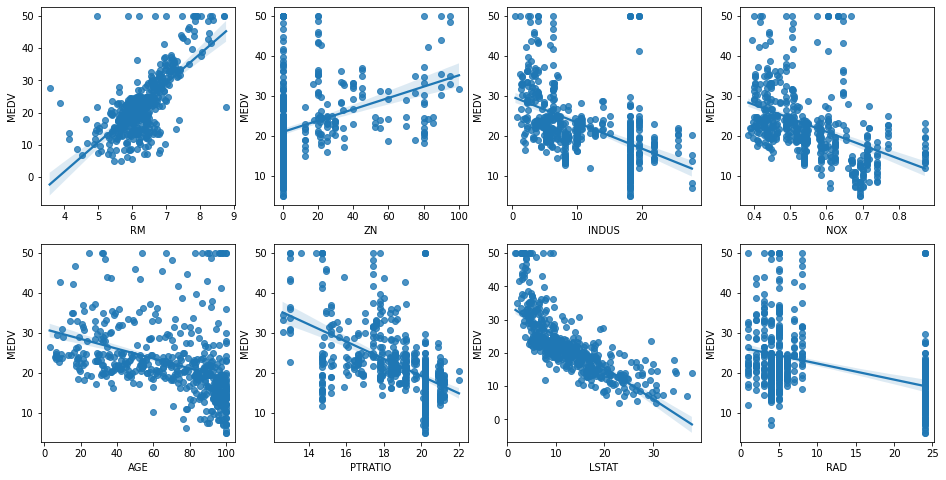

In [43]:
fig, axs = plt.subplots(figsize = (16, 8), ncols = 4, nrows = 2)

lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
 
for i, feature in enumerate(lm_features):
    row = int(i / 4) # 2행
    col = i % 4

    # sns.regplot: 회귀직선을 그려줌
    sns.regplot(x = feature, y = 'MEDV', data = df_data, ax = axs[row][col])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


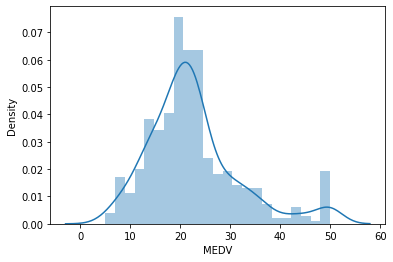

In [44]:
sns.distplot(df_data['MEDV'])

- 위 그래프는 한 쪽으로 쏠린 모양이 보인다. 이런 경우 학습에 영향을 줄 수 있기 때문에 로그 변환을 통해 정규성을 띄게 바꾸어준다.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


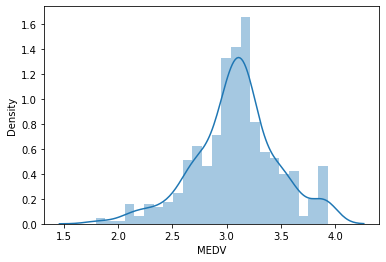

In [45]:
df_data['MEDV'] = np.log1p(df_data["MEDV"])
sns.distplot(df_data['MEDV'])

In [46]:
# feature, target 데이터 분리
y_target = df_data['MEDV'] # 종속변수
X_data = df_data.drop(['MEDV'], axis = 1, inplace = False) # 독립변수(피쳐)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state = 156)

In [47]:
# Linear Regression
lr = LinearRegression()

# fit 메서드 학습: 주어진 데이터로 알고리즘 학습
lr.fit(X_train, y_train)
print(X_train.shape, X_test.shape)

(354, 13) (152, 13)


In [48]:
# predict 메서드: 학습된 모델로 예측을 수행
y_preds = lr.predict(X_test)
y_preds[0:5]

array([3.11739514, 3.0601669 , 3.57991616, 2.91705822, 3.47955181])

In [49]:
# RNSE를 활용한 평가
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print(f'MSE: {mse:.3f}, RMSE: {rmse: .3f}')
print(f'Variance score: {r2_score(y_test, y_preds): .3f}')
print(f'Explained_variance_score: {explained_variance_score(y_test, y_preds): .3f}')

MSE: 0.031, RMSE:  0.176
Variance score:  0.794
Explained_variance_score:  0.815
